In [2]:
pip install pandas

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install librosa

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install awkward

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt

LOCAL IMPORT

In [7]:
dataset_folder = pathlib.Path("/Users/davidepiccoli/Desktop/ravd2")

In [8]:
file_list = list(dataset_folder.iterdir())
for i, path in enumerate(file_list):
    if path.suffix != ".wav":
        file_list.pop(i)
file_list = sorted(file_list)
file_list

[PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-01.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-02.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-03.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-04.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-05.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-06.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-07.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-08.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-09.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-10.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-11.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-12.wav'),
 PosixPath('/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-13.wav'),
 PosixPath('/Users/davide

In [9]:
pip install ipywidgets

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
df=pd.read_csv("/Users/davidepiccoli/Desktop/ravd2/audio_df.csv")

In [11]:
df_sorted_actor = df.sort_values(by=["actor", "filename"])
idxs_sorted = list(df_sorted_actor.index)

In [12]:
idx_train = list(df_sorted_actor[df_sorted_actor.actor.astype(int) < 19].index)
idx_test = list(df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19].index)

DATA PREPARATION

In [13]:
pip install pyts

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tsfresh

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa


from scipy.signal import decimate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from pyts.metrics import dtw as dtw2
import numpy as np
import scipy.stats as stats
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
import zlib
import string
from pyts.approximation import DiscreteFourierTransform
from sklearn.decomposition import TruncatedSVD, randomized_svd
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


158558
350000


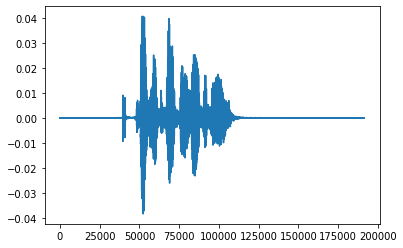

In [16]:
###per fare tutte lunghezze uguali alla fine non è servito ma il codice per ora lo terrei
path = '/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-01.wav'
ts1, sr = librosa.load(path, sr=None)
ts1 = pd.Series(ts1)
z = np.zeros(shape=350000-ts1.size)
z = pd.Series(z)
print(ts1.size)
ts1 = pd.concat([ts1,z])
print(ts1.size)
ts2 = decimate(ts1[100000:350000], q=1)
plt.plot(ts1)
plt.show()

In [17]:
### approssimazione con dft
n_coefs = 10000

dft = DiscreteFourierTransform(n_coefs=n_coefs)
###ts_dft = dft.fit_transform(ts.values.reshape(1, -1))

# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

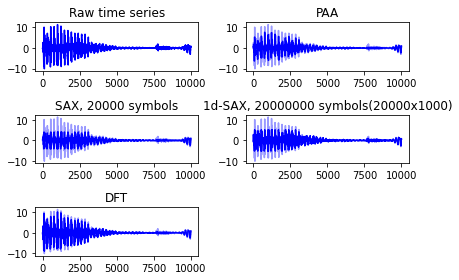

In [18]:
#confronto tra i vari metodi di approssimazione

path = '/Users/davidepiccoli/Desktop/ravd2/03-01-01-01-01-01-02.wav'
ts, sr = librosa.load(path, sr=None)
ts = pd.Series(ts)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.values.reshape(1,-1))

tsd = pd.Series(ts.ravel())
ts_dft = dft.fit_transform(tsd.values.reshape(1, -1))
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=len(tsd.values))


#############################################################################
# PAA transform (and inverse transform) of the data
n_paa_segments = 10000
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 20000
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 20000
n_sax_symbols_slope = 1000
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(3, 2, 1)  # First, raw time series
plt.plot((ts[0].ravel())[79000:89000], "b-")
plt.title("Raw time series")


plt.subplot(3, 2, 2)  # Second, PAA
plt.plot((ts[0].ravel())[79000:89000], "b-", alpha=0.4)
plt.plot((paa_dataset_inv[0].ravel())[79000:89000], "b-")
plt.title("PAA")


plt.subplot(3, 2, 3)  # Then SAX
plt.plot((ts[0].ravel())[79000:89000], "b-", alpha=0.4)
plt.plot((sax_dataset_inv[0].ravel())[79000:89000], "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)


plt.subplot(3, 2, 4)  # Finally, 1d-SAX
plt.plot((ts[0].ravel())[79000:89000], "b-", alpha=0.4)
plt.plot((one_d_sax_dataset_inv[0].ravel())[79000:89000], "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))


#################################################################################

plt.subplot(3, 2, 5)
plt.plot((ts[0].ravel())[79000:89000], "b-", alpha=0.4)
plt.plot((ts_dft_inv[0].ravel())[79000:89000], "b-")
plt.title("DFT")


plt.tight_layout()
plt.show()

In [19]:
from pyts.approximation import SymbolicAggregateApproximation

###
time_series = list()
rate = list()

for path in file_list:
    #qui dovete mettere il vostro path
    ts, sr = librosa.load(path, sr=None)
    
    #taglio le "code"
    ts = ts[40000:120000]
    #trasformazioni scelte
    #downsample
    ts = decimate(ts, q=20)
    ts = pd.Series(ts) 
    #offset translation
    ts = ts - ts.mean()
    ts = pd.Series(ts)
    #trend removal
    ts = ts - ts.rolling(window=50).mean()
    ts = pd.Series(ts)
    #amptitude scaling
    ts = (ts - ts.mean())/ts.std()
    #smoothing
    ts = ts.rolling(window=5).mean()
    ts = pd.Series(ts)
    #fill the zeros
    ts = ts.fillna(0.0)
    ts = pd.Series(ts)

    #approssimazione scelta
    #SAX
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    ts = scaler.fit_transform(ts.values.reshape(1,-1))
    
    n_paa_segments = 300
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    ts_paa = paa.fit_transform(ts)
    ts = ts_paa.ravel()
    #sax = SymbolicAggregateApproximation(n_bins=6, strategy='uniform')
    #ts_sax = sax.fit_transform(ts.reshape(1,-1))
    
    time_series.append(np.squeeze(ts))
    rate.append(sr)


df["time_series"] = time_series
df["rate"] = rate

CLUSTERING

In [20]:
df["time_series"]

0       [5.998321986033044e-06, 5.998321986033044e-06,...
1       [-9.363434588972221e-05, -9.363434588972221e-0...
2       [-0.0001944092188311723, -0.000194409218831172...
3       [-8.737022556175778e-06, -8.737022556175778e-0...
4       [-8.641606687581128e-06, -8.641606687581128e-0...
                              ...                        
2447    [-3.484746030512941e-05, -3.484746030512941e-0...
2448    [-0.00029317300532257336, -0.00029317300532257...
2449    [-0.0005187036755937604, -0.000518703675593760...
2450    [6.087712813768154e-05, 6.087712813768154e-05,...
2451    [-0.0018910529325176378, -0.001891052932517637...
Name: time_series, Length: 2452, dtype: object

In [21]:
len(df["time_series"][8])

300

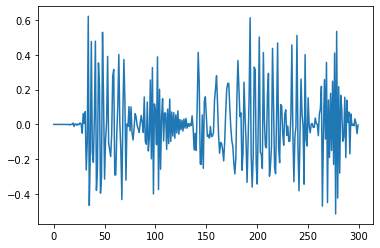

In [22]:
plt.plot(df["time_series"][50])
plt.show()

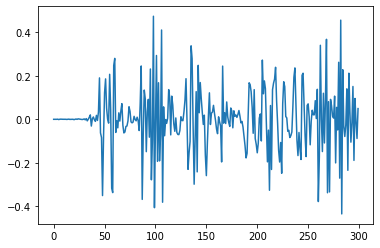

In [23]:
plt.plot(df.time_series[2])
plt.show()

In [24]:
df.time_series.shape

(2452,)

In [25]:
timeseries=np.zeros((2452,300))
timeseries

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
i=0

for item in df.time_series:
    timeseries[i] = item
    i+=1
    
timeseries

array([[ 5.99832199e-06,  5.99832199e-06,  5.99832199e-06, ...,
         5.65748044e-03, -6.39768140e-03, -1.30363745e-03],
       [-9.36343459e-05, -9.36343459e-05, -9.36343459e-05, ...,
         3.51075842e-02,  3.26769498e-02, -2.43566492e-02],
       [-1.94409219e-04, -1.94409219e-04, -1.94409219e-04, ...,
        -1.25019898e-02, -8.82705981e-02,  4.90369425e-02],
       ...,
       [-5.18703676e-04, -5.18703676e-04, -5.18703676e-04, ...,
        -1.35862673e-01, -7.91585486e-02,  2.61021165e-02],
       [ 6.08771281e-05,  6.08771281e-05,  6.08771281e-05, ...,
         1.14718789e-02,  2.63870433e-02,  3.81457875e-02],
       [-1.89105293e-03, -1.89105293e-03, -1.89105293e-03, ...,
         3.12579182e-01,  3.73164515e-01,  2.41651450e-01]])

In [27]:
timeseries.shape

(2452, 300)

In [28]:
from tslearn.clustering import TimeSeriesKMeans
model_eucl = TimeSeriesKMeans(n_clusters=8, metric="euclidean", max_iter=10)
model_eucl.fit(timeseries)

TimeSeriesKMeans(max_iter=10, n_clusters=8)

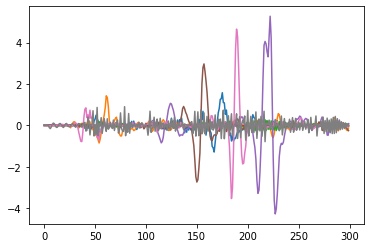

In [29]:
plt.plot(np.squeeze(model_eucl.cluster_centers_).T)
plt.show()

In [30]:
from sklearn import metrics

print(f"Silhouette Coefficient: {metrics.silhouette_score(timeseries, model_eucl.labels_):.3f}")

Silhouette Coefficient: 0.286


In [31]:
print(model_eucl.inertia_)


12.689255928560337


In [32]:
sse=[]
silhouette=[]

for i in range(2, 9):
    model=TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=10)
    model.fit(timeseries)
    sse.append(model.inertia_)
    silhouette.append(metrics.silhouette_score(timeseries, model.labels_))
    

<function matplotlib.pyplot.show(close=None, block=None)>

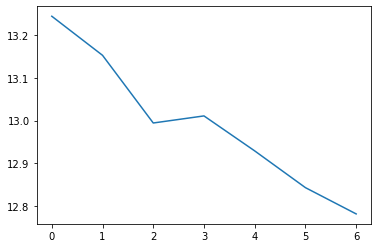

In [33]:
plt.plot(sse)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

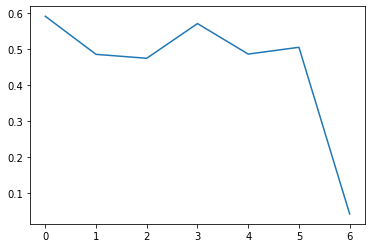

In [34]:
plt.plot(silhouette)
plt.show

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(timeseries)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
silhouette=[]

for i in range(2, 9):
    model=AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    model.fit_predict(timeseries)
    silhouette.append(metrics.silhouette_score(timeseries, model.labels_))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.wa

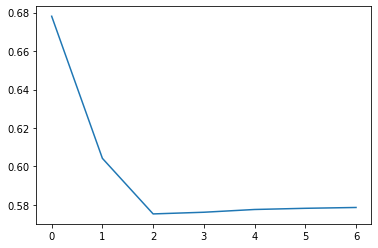

In [38]:
plt.plot(silhouette)
plt.show()

From the analysis above, the best results are obtained when Kmeans is applied with n_clusters = 6 and when hierarchical clustering is applied by taking 2 clusters from the dendrogram. Thus these two cases are considered for the following visualizations through dimensionality reduction.

In [39]:
kmeans=TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=10)
kmeans.fit(timeseries)

TimeSeriesKMeans(max_iter=10, n_clusters=6)

In [40]:
hierarchical=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(timeseries)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

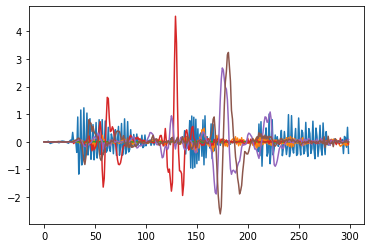

In [41]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

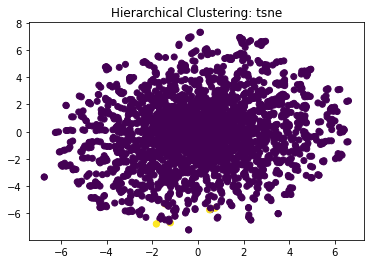

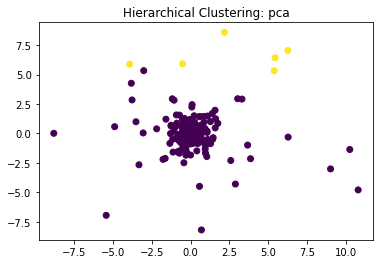

In [42]:
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#distances = pairwise_distances(timeseries)


# Apply dimensionality reduction techniques to visualize the clusters in 2D
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)

# Transform the data using the dimensionality reduction techniques
tsne_data = tsne.fit_transform(timeseries)
pca_data = pca.fit_transform(timeseries)

# Plot the clusters using the reduced dimensions
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=hierarchical.labels_)
plt.title('Hierarchical Clustering: tsne')
plt.show()

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical.labels_)
plt.title('Hierarchical Clustering: pca')
plt.show()

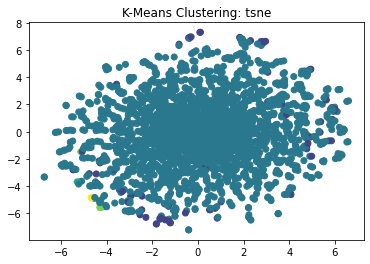

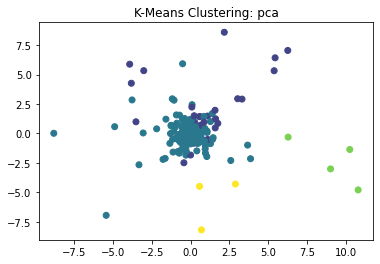

In [43]:
# Plot the clusters using the reduced dimensions
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering: tsne')
plt.show()

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering: pca')
plt.show()

In [44]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

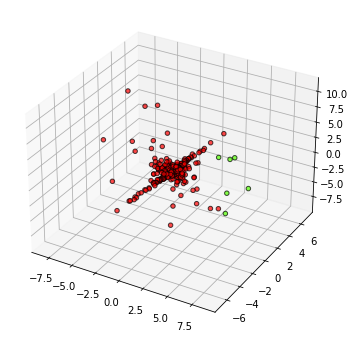

In [45]:
# Apply dimensionality reduction techniques to visualize the clusters in 2D
tsne = TSNE(n_components=3)
pca = PCA(n_components=3)

# Transform the data using the dimensionality reduction techniques
tsne_data = tsne.fit_transform(timeseries)
pca_data = pca.fit_transform(timeseries)

# Plot the clusters using the reduced dimensions
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = pca_data[:, 0]
xdata = pca_data[:, 1]
ydata = pca_data[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=hierarchical.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)




<Figure size 432x288 with 0 Axes>

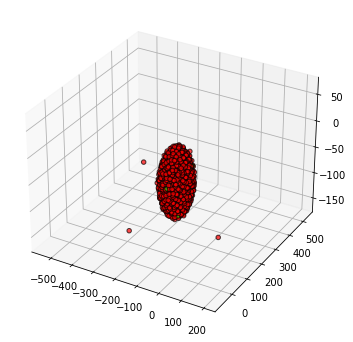

In [255]:
# Plot the clusters using the reduced dimensions
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = tsne_data[:, 0]
xdata = tsne_data[:, 1]
ydata = tsne_data[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=hierarchical.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

<Figure size 432x288 with 0 Axes>

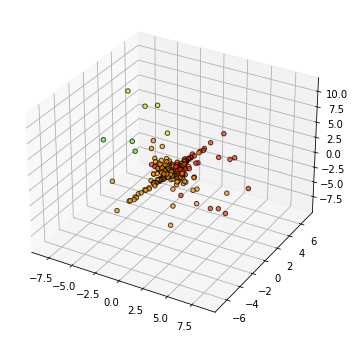

In [47]:
# Plot the clusters using the reduced dimensions
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = pca_data[:, 0]
xdata = pca_data[:, 1]
ydata = pca_data[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=kmeans.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

<Figure size 432x288 with 0 Axes>

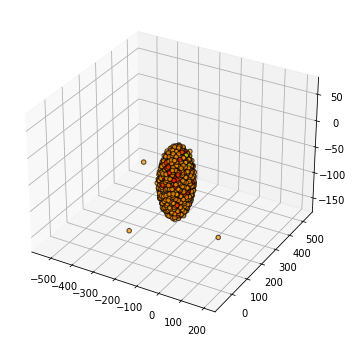

In [48]:
# Plot the clusters using the reduced dimensions
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = tsne_data[:, 0]
xdata = tsne_data[:, 1]
ydata = tsne_data[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=kmeans.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

MOTIFS AND DISCORDS

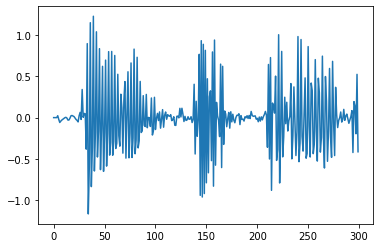

In [49]:
plt.plot(np.squeeze(kmeans.cluster_centers_[0]).T)
plt.show()

In [50]:
pip install matrixprofile-ts

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [51]:
from matrixprofile import *

In [52]:
ts=np.squeeze(kmeans.cluster_centers_[0])

In [53]:
ts.T

array([ 4.43822811e-05,  4.43822811e-05,  4.43822811e-05,  4.43822811e-05,
        2.29896854e-02, -2.18215723e-02, -5.87975509e-02, -4.26257033e-02,
       -2.95659891e-02, -2.01601198e-02, -9.61538888e-03, -9.88413345e-04,
        3.75195357e-03, -5.09169537e-03, -2.93489493e-02, -2.92698214e-02,
       -6.85638279e-03,  2.21019778e-02,  2.59632212e-02,  1.92411674e-02,
        1.26971745e-02, -4.19119374e-03, -2.24679789e-02, -3.38975188e-02,
       -5.18306941e-02,  2.22927619e-02,  6.37947515e-02, -2.22418317e-02,
        3.41321272e-01,  3.80985077e-03,  5.07926886e-02,  4.53931330e-02,
       -3.82404118e-01,  8.97991740e-01, -1.16846217e+00, -5.99606871e-01,
        1.15185353e+00, -8.37191764e-01, -3.66402422e-01,  1.23017144e+00,
       -6.47592712e-01, -1.83872208e-01,  1.04139283e+00, -4.77891758e-01,
       -1.62510991e-01,  8.36700341e-01, -6.31341338e-01, -1.33264424e-01,
        6.22252247e-01, -6.52014684e-01, -1.85536814e-01,  6.97923695e-01,
       -5.88139862e-01, -

In [54]:
ts.shape

(300,)

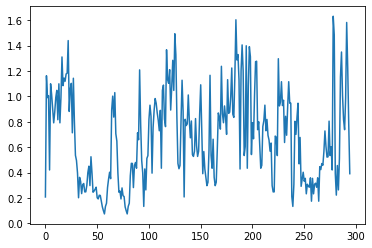

In [55]:
w = 6
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

In [56]:
mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)

In [57]:
mo #motifs: a list of lists of indexes representing the motif starting locations.

[[57, 79], [95, 239], [250, 257, 264], [36, 51, 73], [32, 47, 281]]

In [58]:
mod #distances: list of minimum distances for each motif

[0.0745845552063027,
 0.1336357337528943,
 0.1747273405854472,
 0.19248563255424525,
 0.2018715790201295]

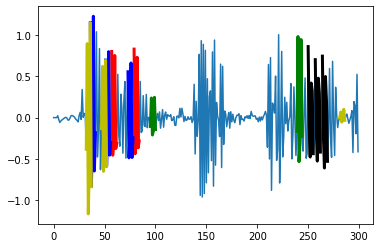

In [59]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

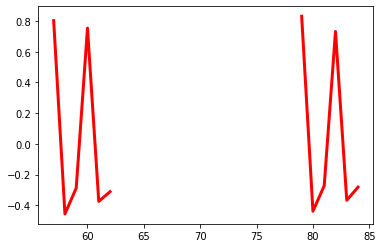

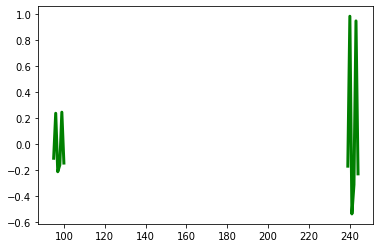

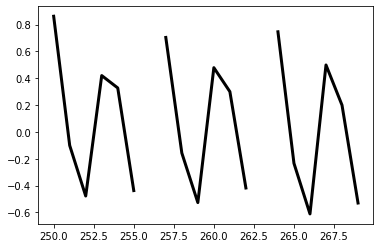

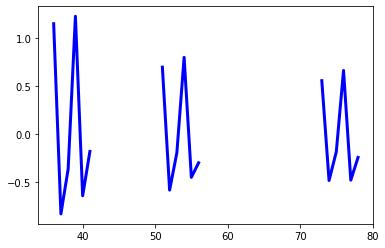

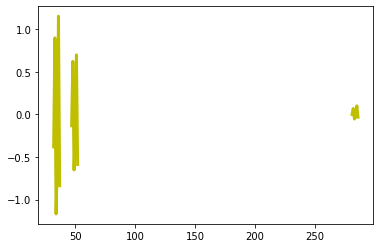

In [60]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [61]:
from matrixprofile.discords import discords

In [62]:
anoms = discords(mp, ex_zone=3, k=5)

In [63]:
anoms

array([278, 184, 291, 125,  22])

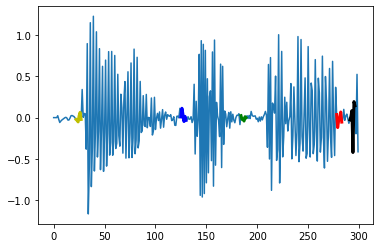

In [64]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

CLASSIFICATION

In [65]:
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,time_series,rate
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,"[5.998321986033044e-06, 5.998321986033044e-06,...",48000
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,2,F,03-01-01-01-01-01-02.wav,"[-9.363434588972221e-05, -9.363434588972221e-0...",48000
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,3,M,03-01-01-01-01-01-03.wav,"[-0.0001944092188311723, -0.000194409218831172...",48000
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,4,F,03-01-01-01-01-01-04.wav,"[-8.737022556175778e-06, -8.737022556175778e-0...",48000
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,5,M,03-01-01-01-01-01-05.wav,"[-8.641606687581128e-06, -8.641606687581128e-0...",48000
...,...,...,...,...,...,...,...,...,...,...,...
2447,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,20,F,03-02-06-02-02-02-20.wav,"[-3.484746030512941e-05, -3.484746030512941e-0...",48000
2448,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,21,M,03-02-06-02-02-02-21.wav,"[-0.00029317300532257336, -0.00029317300532257...",48000
2449,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,22,F,03-02-06-02-02-02-22.wav,"[-0.0005187036755937604, -0.000518703675593760...",48000
2450,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,23,M,03-02-06-02-02-02-23.wav,"[6.087712813768154e-05, 6.087712813768154e-05,...",48000


In [66]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [69]:
dfts = pd.DataFrame(timeseries)

In [70]:
dfts

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000006,0.000006,0.000006,0.000006,0.008630,-0.005181,-0.006176,0.008068,0.000781,-0.010279,...,0.007724,0.002092,-0.001232,-0.000911,0.004609,-0.001460,-0.003354,0.005657,-0.006398,-0.001304
1,-0.000094,-0.000094,-0.000094,-0.000094,-0.000098,-0.000091,-0.000033,-0.000106,-0.000087,-0.000135,...,0.120761,-0.133563,0.203580,-0.128577,0.087349,-0.060018,-0.007920,0.035108,0.032677,-0.024357
2,-0.000194,-0.000194,-0.000194,-0.000194,0.000383,-0.001395,0.000148,0.000488,-0.000015,-0.000044,...,0.211838,0.038840,-0.105217,-0.016505,0.150783,-0.189118,0.095754,-0.012502,-0.088271,0.049037
3,-0.000009,-0.000009,-0.000009,-0.000009,-0.000029,-0.000001,-0.000055,-0.000202,-0.000160,-0.000003,...,-0.001269,0.010474,0.000776,-0.003164,0.001941,-0.007349,0.006340,0.006164,0.020756,-0.005816
4,-0.000009,-0.000009,-0.000009,-0.000009,0.030538,0.021414,0.007849,0.001334,0.001823,0.001603,...,-0.746537,0.591216,-0.759362,0.595331,-0.589365,0.719070,-0.713096,1.027494,-1.049993,1.038739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,-0.000035,-0.000035,-0.000035,-0.000035,0.002648,-0.001740,-0.004556,-0.009772,-0.011066,0.000434,...,0.081756,-0.020327,-0.058906,-0.068192,-0.002740,0.057222,-0.051089,0.022712,-0.122808,0.156972
2448,-0.000293,-0.000293,-0.000293,-0.000293,-0.000951,-0.000533,-0.000301,-0.000429,-0.000693,-0.000986,...,-0.092037,-0.110120,-0.079458,-0.118518,0.008190,0.151175,0.087481,-0.000589,-0.041647,-0.091626
2449,-0.000519,-0.000519,-0.000519,-0.000519,0.004234,-0.000292,-0.004016,-0.003481,0.002754,0.002483,...,-0.037685,-0.045120,0.003106,0.089615,0.130426,0.044894,-0.085130,-0.135863,-0.079159,0.026102
2450,0.000061,0.000061,0.000061,0.000061,0.002482,-0.010504,-0.003076,0.003782,0.008732,0.003027,...,0.043362,-0.008226,-0.092074,-0.060643,0.017145,0.038182,0.024652,0.011472,0.026387,0.038146


In [92]:
X_train, X_test, y_train, y_test = train_test_split(dfts, df.emotion, test_size=0.3, random_state=100, stratify=df.emotion)

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.19701086956521738
F1-score [0.2        0.13065327 0.13333333 0.28152493 0.08       0.06349206
 0.27173913 0.07894737]
              precision    recall  f1-score   support

       angry       0.34      0.14      0.20       113
        calm       0.15      0.12      0.13       113
     disgust       0.19      0.10      0.13        58
     fearful       0.21      0.42      0.28       113
       happy       0.11      0.06      0.08       113
     neutral       0.29      0.04      0.06        56
         sad       0.20      0.44      0.27       113
   surprised       0.16      0.05      0.08        57

    accuracy                           0.20       736
   macro avg       0.21      0.17      0.15       736
weighted avg       0.20      0.20      0.17       736



In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.1331521739130435
F1-score [0.11764706 0.12738854 0.         0.24945295 0.07692308 0.10833333
 0.01162791 0.03389831]
              precision    recall  f1-score   support

       angry       0.18      0.09      0.12       113
        calm       0.23      0.09      0.13       113
     disgust       0.00      0.00      0.00        58
     fearful       0.17      0.50      0.25       113
       happy       0.14      0.05      0.08       113
     neutral       0.07      0.23      0.11        56
         sad       0.02      0.01      0.01       113
   surprised       0.50      0.02      0.03        57

    accuracy                           0.13       736
   macro avg       0.16      0.12      0.09       736
weighted avg       0.16      0.13      0.10       736



In [87]:
X_trainval, X_valid, y_trainval, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=100, stratify=y_train)

# this is done in  order to perform cross validation: train becomes trainval and test becomes valid

In [88]:
accuracy=[]

for i in range(1, 101):
    clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    clf.fit(X_trainval, y_trainval)
    
    y_pred = clf.predict(X_valid)
    
    accuracy.append(accuracy_score(y_valid, y_pred))    

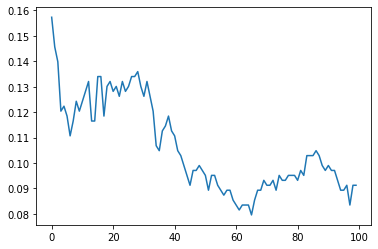

In [89]:
plt.plot(accuracy)
plt.show()

In [94]:
from pyts.classification import KNeighborsClassifier

In [95]:
clf = KNeighborsClassifier(n_neighbors=10, metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36820652173913043
F1-score [0.32758621 0.48507463 0.25531915 0.3539823  0.30567686 0.45454545
 0.38190955 0.2826087 ]
              precision    recall  f1-score   support

       angry       0.32      0.34      0.33       113
        calm       0.42      0.58      0.49       113
     disgust       0.33      0.21      0.26        58
     fearful       0.35      0.35      0.35       113
       happy       0.30      0.31      0.31       113
     neutral       0.39      0.54      0.45        56
         sad       0.44      0.34      0.38       113
   surprised       0.37      0.23      0.28        57

    accuracy                           0.37       736
   macro avg       0.37      0.36      0.36       736
weighted avg       0.37      0.37      0.36       736



In [96]:
accuracy=[]

for i in range(1, 101, 20):
    clf = KNeighborsClassifier(n_neighbors=i, metric='dtw_sakoechiba')
    clf.fit(X_trainval, y_trainval)
    
    y_pred = clf.predict(X_valid)
    
    accuracy.append(accuracy_score(y_valid, y_pred)) 

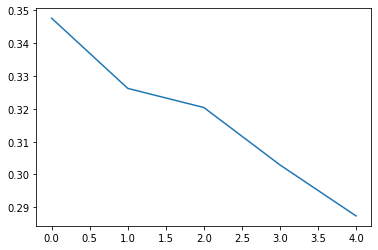

In [99]:
plt.plot(accuracy)
plt.show()

In [101]:
#shapelets

from pyts.transformation import ShapeletTransform

In [104]:
###
time_series = list()
rate = list()

for path in file_list:
    #qui dovete mettere il vostro path
    ts, sr = librosa.load(path, sr=None)
    
    #taglio le "code"
    ts = ts[40000:120000]
    #trasformazioni scelte
    #downsample
    ts = decimate(ts, q=20)
    ts = pd.Series(ts) 
    #offset translation
    ts = ts - ts.mean()
    ts = pd.Series(ts)
    #trend removal
    ts = ts - ts.rolling(window=50).mean()
    ts = pd.Series(ts)
    #amptitude scaling
    ts = (ts - ts.mean())/ts.std()
    #smoothing
    ts = ts.rolling(window=5).mean()
    ts = pd.Series(ts)
    #fill the zeros
    ts = ts.fillna(0.0)
    ts = pd.Series(ts)

    #approssimazione scelta
    #SAX
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    ts = scaler.fit_transform(ts.values.reshape(1,-1))
    
    n_paa_segments = 90
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    ts_paa = paa.fit_transform(ts)
    ts = ts_paa.ravel()
    #sax = SymbolicAggregateApproximation(n_bins=6, strategy='uniform')
    #ts_sax = sax.fit_transform(ts.reshape(1,-1))
    
    time_series.append(np.squeeze(ts))
    rate.append(sr)


df["time_series"] = time_series
df["rate"] = rate

ERROR! Session/line number was not unique in database. History logging moved to new session 840


In [105]:
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,time_series,rate
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,"[5.998321986033044e-06, -0.0008916143182675153...",48000
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,2,F,03-01-01-01-01-01-02.wav,"[-9.363434588972218e-05, -7.943416177847241e-0...",48000
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,3,M,03-01-01-01-01-01-03.wav,"[-0.0001944092188311722, -0.000303939556309227...",48000
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,4,F,03-01-01-01-01-01-04.wav,"[-8.737022556175777e-06, -2.305710784070131e-0...",48000
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,5,M,03-01-01-01-01-01-05.wav,"[-8.641606687581128e-06, 0.01738373560604363, ...",48000
...,...,...,...,...,...,...,...,...,...,...,...
2447,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,20,F,03-02-06-02-02-02-20.wav,"[-3.484746030512941e-05, -0.001721181704933534...",48000
2448,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,21,M,03-02-06-02-02-02-21.wav,"[-0.00029317300532257336, -0.00056592172043947...",48000
2449,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,22,F,03-02-06-02-02-02-22.wav,"[-0.0005187036755937604, 0.0003694281557683382...",48000
2450,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,23,M,03-02-06-02-02-02-23.wav,"[6.0877128137681536e-05, -0.003142196266589730...",48000


In [144]:
newdf = df.iloc[np.r_[0:10, 174:184, 288:298, 480:490, 672:682, 864:874, 1095:1105, 1324:1334]]
newdf.reset_index(drop=True, inplace=True)

In [145]:
newdf 

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,time_series,rate
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,"[5.998321986033044e-06, -0.0008916143182675153...",48000
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,2,F,03-01-01-01-01-01-02.wav,"[-9.363434588972218e-05, -7.943416177847241e-0...",48000
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,3,M,03-01-01-01-01-01-03.wav,"[-0.0001944092188311722, -0.000303939556309227...",48000
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,4,F,03-01-01-01-01-01-04.wav,"[-8.737022556175777e-06, -2.305710784070131e-0...",48000
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,5,M,03-01-01-01-01-01-05.wav,"[-8.641606687581128e-06, 0.01738373560604363, ...",48000
...,...,...,...,...,...,...,...,...,...,...,...
75,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,10,F,03-01-08-01-02-02-10.wav,"[3.033961242686968e-05, 0.002899834714204928, ...",48000
76,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,11,M,03-01-08-01-02-02-11.wav,"[4.786518163975117e-06, -0.0020886056708215458...",48000
77,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,12,F,03-01-08-01-02-02-12.wav,"[-0.00031258793998921344, -0.00159308941140747...",48000
78,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,13,M,03-01-08-01-02-02-13.wav,"[4.399275606160724e-06, -0.0005250251496344322...",48000


In [146]:
timeseries=np.zeros((80,90))

In [147]:
i=0

for item in newdf.time_series:
    timeseries[i] = item
    i+=1
    
timeseries

array([[ 5.99832199e-06, -8.91614318e-04, -3.15606291e-04, ...,
         5.57897090e-04, -7.80193325e-04, -7.18953566e-04],
       [-9.36343459e-05, -7.94341618e-05, -1.05576571e-04, ...,
         2.84590838e-02, -8.31610151e-04, -6.24348452e-03],
       [-1.94409219e-04, -3.03939556e-04,  1.36804988e-04, ...,
        -1.42313025e-02, -2.62198183e-02, -7.15196830e-04],
       ...,
       [-3.12587940e-04, -1.59308941e-03,  1.04305376e-03, ...,
         1.22864594e-02, -7.51642659e-03, -4.13887190e-04],
       [ 4.39927561e-06, -5.25025150e-04, -1.14293101e-03, ...,
         1.81435934e-03,  2.89584755e-04, -6.19981074e-04],
       [-1.55416976e-06,  5.64468960e-07,  1.33316349e-05, ...,
        -2.63132688e-04,  4.95839864e-04, -5.74236001e-04]])

In [148]:
timeseries.shape

(80, 90)

In [149]:
newdfts = pd.DataFrame(timeseries)

In [150]:
newdfts

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000006,-8.916143e-04,-0.000316,-0.001217,0.002405,0.000170,0.000652,-0.001705,0.000398,0.002230,...,-0.002006,-0.005897,0.001237,0.003489,-0.001065,0.000369,0.000956,0.000558,-0.000780,-0.000719
1,-0.000094,-7.943416e-05,-0.000106,-0.000108,-0.000098,-0.000098,-0.000034,-0.000523,-0.000148,0.000385,...,0.010904,0.039378,-0.046260,0.033089,-0.009409,-0.026920,-0.018542,0.028459,-0.000832,-0.006243
2,-0.000194,-3.039396e-04,0.000137,-0.000055,-0.000217,0.000078,-0.000424,0.000929,-0.000614,0.001085,...,-0.112558,-0.032550,0.099456,-0.115045,0.006107,0.067747,0.004717,-0.014231,-0.026220,-0.000715
3,-0.000009,-2.305711e-05,-0.000102,0.000675,-0.001302,0.001559,-0.001711,0.001722,-0.000924,0.009200,...,0.010402,-0.020382,0.004821,-0.021896,0.019434,-0.001347,0.007399,-0.005094,-0.000121,-0.001751
4,-0.000009,1.738374e-02,0.001752,-0.000629,0.003345,0.001550,0.024201,-0.022406,-0.011879,0.078826,...,0.037437,0.057090,-0.028526,0.039882,0.023129,-0.103954,0.016860,0.221755,-0.231674,0.165012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000030,2.899835e-03,-0.003520,-0.000154,0.002466,0.000022,-0.000345,-0.002140,0.005110,-0.020262,...,-0.038787,0.007365,-0.026147,0.045884,-0.056392,-0.004510,0.009836,0.029893,-0.005976,-0.004639
76,0.000005,-2.088606e-03,-0.002826,-0.007715,0.008127,0.003479,-0.000971,-0.001440,0.037387,0.040972,...,0.001437,-0.000209,0.005816,0.001431,-0.005117,-0.005244,-0.001211,-0.003433,0.000421,-0.000720
77,-0.000313,-1.593089e-03,0.001043,0.002596,-0.001093,-0.002843,-0.000073,0.001467,-0.000998,-0.001306,...,0.044938,-0.014291,-0.057732,0.004336,0.012942,0.011164,-0.005814,0.012286,-0.007516,-0.000414
78,0.000004,-5.250251e-04,-0.001143,-0.001165,0.002588,0.001777,0.002880,0.006882,0.009731,-0.047758,...,-0.000937,0.003621,0.000121,0.007463,-0.010145,0.001927,-0.000632,0.001814,0.000290,-0.000620


In [151]:
X_train, X_test, y_train, y_test = train_test_split(newdfts, newdf.emotion, test_size=0.3, random_state=100, stratify=newdf.emotion)

In [152]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
14,1.175515e-03,-1.077499e-02,0.006635,0.009692,-0.008060,-0.001536,0.009399,-0.005314,-0.013101,0.021120,...,-0.185269,0.130178,-0.005769,-0.073509,0.039900,-0.093722,-0.035275,0.105446,-0.028191,-0.190174
78,4.399276e-06,-5.250251e-04,-0.001143,-0.001165,0.002588,0.001777,0.002880,0.006882,0.009731,-0.047758,...,-0.000937,0.003621,0.000121,0.007463,-0.010145,0.001927,-0.000632,0.001814,0.000290,-0.000620
61,1.232296e-04,-9.516222e-04,-0.005714,-0.002885,0.012987,-0.005101,0.002150,-0.000890,-0.001476,-0.004739,...,-0.095155,0.075665,-0.033069,-0.046679,-0.008489,0.083845,-0.007467,-0.096652,0.025551,-0.012177
34,-8.866752e-06,3.489588e-02,0.025960,0.020985,0.046356,0.018138,-0.022520,-0.034226,-0.026973,-0.005960,...,-0.048116,-0.018769,0.003597,0.005636,-0.016330,0.033111,-0.029454,0.014923,0.030353,-0.003854
68,-8.262209e-04,3.894739e-04,0.000757,0.000619,0.000688,0.000737,0.000670,0.000849,0.000219,0.000833,...,0.097785,-0.029739,-0.095451,0.032255,0.018648,-0.087135,0.059739,-0.004518,-0.062132,0.114190
50,-2.429000e-04,1.541067e-03,0.001653,-0.001832,-0.002728,0.006878,0.002218,-0.004445,-0.000773,0.006917,...,-0.022441,-0.035522,0.008980,0.132080,-0.166333,0.181089,-0.159784,0.056830,-0.013743,-0.042675
56,-1.370528e-04,-4.985795e-03,-0.006317,-0.005090,0.004096,0.015848,0.029339,0.004343,-0.015040,-0.027597,...,-0.043664,-0.084207,0.041044,0.045459,0.009041,0.022977,0.039226,-0.041274,-0.038994,-0.011097
18,-1.140699e-04,1.101553e-03,0.001554,0.003391,0.011706,-0.009016,-0.026957,0.017064,0.011095,0.016561,...,0.020390,-0.015956,0.019888,0.102073,0.040242,-0.010814,-0.010197,-0.011559,-0.015279,-0.027991
59,-5.529908e-06,2.163067e-03,-0.000069,0.001572,-0.003136,0.001697,0.000390,-0.000467,-0.001167,0.003947,...,-0.018660,-0.005300,0.011749,0.007885,0.001958,-0.001663,-0.000704,0.000999,0.014150,-0.007961
77,-3.125879e-04,-1.593089e-03,0.001043,0.002596,-0.001093,-0.002843,-0.000073,0.001467,-0.000998,-0.001306,...,0.044938,-0.014291,-0.057732,0.004336,0.012942,0.011164,-0.005814,0.012286,-0.007516,-0.000414


In [153]:
y_train

14         calm
78    surprised
61      disgust
34          sad
68      disgust
50      fearful
56      fearful
18         calm
59      fearful
77    surprised
1       neutral
24        happy
25        happy
15         calm
23        happy
8       neutral
0       neutral
20        happy
22        happy
44        angry
74    surprised
41        angry
76    surprised
6       neutral
5       neutral
39          sad
58      fearful
46        angry
36          sad
79    surprised
73    surprised
65      disgust
29        happy
38          sad
26        happy
52      fearful
17         calm
42        angry
4       neutral
33          sad
51      fearful
13         calm
67      disgust
63      disgust
32          sad
40        angry
45        angry
31          sad
16         calm
10         calm
47        angry
69      disgust
64      disgust
72    surprised
57      fearful
9       neutral
Name: emotion, dtype: object

In [154]:
# Shapelet transformation
st = ShapeletTransform(n_shapelets=8, random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)
X_test_new = st.transform(X_test)

In [155]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_new, y_train)

y_pred = clf.predict(X_test_new)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.08333333333333333
F1-score [0.         0.         0.         0.         0.         0.
 0.36363636 0.        ]
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         3
        calm       0.00      0.00      0.00         3
     disgust       0.00      0.00      0.00         3
     fearful       0.00      0.00      0.00         3
       happy       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         3
         sad       0.25      0.67      0.36         3
   surprised       0.00      0.00      0.00         3

    accuracy                           0.08        24
   macro avg       0.03      0.08      0.05        24
weighted avg       0.03      0.08      0.05        24



In [156]:
st.indices_

array([[ 4, 17, 20],
       [14, 61, 68],
       [54, 66, 71],
       [27, 31, 34],
       [53, 15, 18],
       [31, 82, 85],
       [48,  6, 15],
       [32, 16, 25]])

In [157]:
st.shapelets_

array([array([ 0.10413839, -0.01052623, -0.05194426]),
       array([-0.04024367,  0.04795   , -0.05862334, -0.00886426,  0.10547476,
              -0.0178135 , -0.0915329 ])                                      ,
       array([-0.01419064,  0.00012191, -0.01002786, -0.01559149, -0.0157687 ]),
       array([ 0.00358797,  0.00418976, -0.01757585]),
       array([-0.01927395, -0.09845714,  0.00878557]),
       array([-0.09612067, -0.04009487,  0.00798015]),
       array([-0.01879896, -0.03162762,  0.07900642, -0.09744167,  0.09853616,
              -0.07504842,  0.03429384, -0.08814384,  0.09089559])            ,
       array([ 0.04821035, -0.03106256,  0.02889642, -0.03452001,  0.04925118,
              -0.1457838 ,  0.10719372,  0.013422  , -0.03991067])            ],
      dtype=object)

CNN

In [159]:
X_train, X_test, y_train, y_test = train_test_split(dfts, df.emotion, test_size=0.3, random_state=100, stratify=df.emotion)

In [161]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
697,2.186127e-04,2.186127e-04,2.186127e-04,2.186127e-04,0.023318,-0.034979,0.004095,-0.014837,-0.015585,0.008149,...,0.066518,-0.020538,-0.064656,-0.015842,0.009906,0.028996,0.012245,-0.042760,-0.022720,0.020833
920,2.978604e-05,2.978604e-05,2.978604e-05,2.978604e-05,0.039071,0.047171,0.024708,0.004929,0.006643,-0.031883,...,0.019109,0.003748,0.018940,0.017371,0.020013,0.002610,0.019698,0.005341,-0.013633,-0.008407
2375,-1.222263e-03,-1.222263e-03,-1.222263e-03,-1.222263e-03,-0.000973,0.004270,-0.004025,-0.002031,-0.006382,0.001169,...,0.108364,-0.047887,-0.516302,0.026534,0.270961,0.071740,0.093947,0.366265,-0.236466,-0.407434
2248,-8.513467e-04,-8.513467e-04,-8.513467e-04,-8.513467e-04,-0.001142,0.001079,-0.001184,-0.004479,0.008836,-0.002579,...,0.011047,0.194632,-0.241836,0.090495,-0.082236,0.099369,-0.134766,0.181217,-0.142645,0.068112
388,6.187733e-04,6.187733e-04,6.187733e-04,6.187733e-04,0.002097,0.001269,-0.000387,-0.007622,-0.013286,-0.004563,...,-0.044307,0.028412,0.080575,0.074754,0.007958,-0.040017,-0.054465,0.003608,0.052389,-0.000493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,-3.547215e-04,-3.547215e-04,-3.547215e-04,-3.547215e-04,0.001157,0.000350,-0.000764,-0.000555,0.000663,0.000705,...,0.028646,0.060288,0.040585,0.061103,-0.013986,-0.098182,0.088372,0.209402,0.017264,0.002137
1480,-1.083450e-03,-1.083450e-03,-1.083450e-03,-1.083450e-03,-0.030485,-0.031674,-0.026594,-0.023469,-0.025438,-0.012259,...,0.190011,0.133138,-0.040614,-0.009391,0.084737,0.120275,0.003831,-0.061802,-0.065938,-0.015704
724,6.769104e-04,6.769104e-04,6.769104e-04,6.769104e-04,0.000994,-0.002163,-0.001136,-0.016023,-0.021875,-0.001484,...,-0.224760,0.061572,0.055895,-0.135129,0.421177,-0.378619,0.226667,-0.246829,0.098130,-0.137388
1140,3.754138e-06,3.754138e-06,3.754138e-06,3.754138e-06,0.003720,-0.001876,-0.002234,-0.000758,0.001995,-0.000440,...,0.003783,-0.001824,0.007907,0.033608,0.004310,-0.000658,-0.026221,-0.038369,-0.017069,-0.009157


In [163]:
pip install keras 

     |████████████████████████████████| 1.7 MB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [165]:
pip install tensorflow

     |████████████████████████████████| 230.1 MB 23 kB/s  eta 0:00:01    |██                              | 14.9 MB 2.2 MB/s eta 0:01:40     |██                              | 15.2 MB 2.2 MB/s eta 0:01:40     |██▌                             | 18.3 MB 372 kB/s eta 0:09:29     |██▊                             | 19.4 MB 3.4 MB/s eta 0:01:02     |██▊                             | 19.8 MB 3.4 MB/s eta 0:01:02     |███                             | 22.3 MB 3.4 MB/s eta 0:01:01     |███▏                            | 22.7 MB 2.0 MB/s eta 0:01:45     |████▍                           | 31.7 MB 3.1 MB/s eta 0:01:04     |█████▏                          | 37.1 MB 2.6 MB/s eta 0:01:15     |█████▌                          | 39.9 MB 10.5 MB/s eta 0:00:19     |██████                          | 43.0 MB 10.5 MB/s eta 0:00:18     |███████▊                        | 55.9 MB 3.4 MB/s eta 0:00:51     |█████████▊                      | 70.1 MB 2.3 MB/s eta 0:01:11     |███████████▍                    | 81.9 M

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from keras.layers import LSTM

2023-06-30 23:12:57.800817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [186]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [187]:
cnn = build_simple_cnn(300, 8)

In [188]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 296, 32)           192       
                                                                 
 batch_normalization_7 (Batc  (None, 296, 32)          128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 296, 32)           0         
                                                                 
 dropout_7 (Dropout)         (None, 296, 32)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 293, 64)           8256      
                                                                 
 batch_normalization_8 (Batc  (None, 293, 64)          256       
 hNormalization)                                      

In [170]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [171]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(1716/10, batch_size))

In [174]:
y_train

697       angry
920     fearful
2375    fearful
2248      angry
388       happy
         ...   
2310    fearful
1480    neutral
724       angry
1140    disgust
947     fearful
Name: emotion, Length: 1716, dtype: object

In [175]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical labels in y_train
y_train_e = label_encoder.fit_transform(y_train)

In [189]:
history_cnn = cnn.fit(X_train, y_train_e, epochs=20, batch_size=mini_batch_size, callbacks=callbacks,
                      ).history

Epoch 1/20
108/108 [==============================] - 21s 139ms/step - loss: 2.0216 - accuracy: 0.1707 - lr: 0.0010
Epoch 2/20
108/108 [==============================] - 16s 145ms/step - loss: 1.9313 - accuracy: 0.2174 - lr: 0.0010
Epoch 3/20
108/108 [==============================] - 16s 143ms/step - loss: 1.8676 - accuracy: 0.2587 - lr: 0.0010
Epoch 4/20
108/108 [==============================] - 16s 142ms/step - loss: 1.8324 - accuracy: 0.2686 - lr: 0.0010
Epoch 5/20
108/108 [==============================] - 16s 145ms/step - loss: 1.8031 - accuracy: 0.2867 - lr: 0.0010
Epoch 6/20
108/108 [==============================] - 16s 144ms/step - loss: 1.7828 - accuracy: 0.2896 - lr: 0.0010
Epoch 7/20
108/108 [==============================] - 16s 148ms/step - loss: 1.7632 - accuracy: 0.2984 - lr: 0.0010
Epoch 8/20
108/108 [==============================] - 16s 146ms/step - loss: 1.7551 - accuracy: 0.3164 - lr: 0.0010
Epoch 9/20
108/108 [==============================] - 17s 155ms/step - l

In [179]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical labels in y_train
y_test_e = label_encoder.fit_transform(y_test)

In [190]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test_e, y_pred))
print('F1-score %s' % f1_score(y_test_e, y_pred, average=None))
print(classification_report(y_test_e, y_pred))

23/23 [==============================] - 1s 46ms/step
Accuracy 0.3220108695652174
F1-score [0.20689655 0.49162011 0.02898551 0.27184466 0.28444444 0.34313725
 0.29378531 0.27272727]
              precision    recall  f1-score   support

           0       0.47      0.13      0.21       113
           1       0.36      0.78      0.49       113
           2       0.09      0.02      0.03        58
           3       0.30      0.25      0.27       113
           4       0.29      0.28      0.28       113
           5       0.24      0.62      0.34        56
           6       0.41      0.23      0.29       113
           7       0.39      0.21      0.27        57

    accuracy                           0.32       736
   macro avg       0.32      0.32      0.27       736
weighted avg       0.33      0.32      0.29       736



In [262]:
# Get the mapping of each encoded value back to its original representation
mapping = {i: label for i, label in enumerate(label_encoder.classes_)}

# Print the mapping
for encoded_value, original_value in mapping.items():
    print(f"Encoded value {encoded_value}: {original_value}")

Encoded value 0: angry
Encoded value 1: calm
Encoded value 2: disgust
Encoded value 3: fearful
Encoded value 4: happy
Encoded value 5: neutral
Encoded value 6: sad
Encoded value 7: surprised


EXPLAINABILITY

In [191]:
train_data=pd.read_csv("/Users/davidepiccoli/Desktop/time series project/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv")
test_data=pd.read_csv("/Users/davidepiccoli/Desktop/time series project/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv")

In [217]:
to_drop=[]

for item in train_data.columns:
    if len(np.unique(train_data[item]))<2 or train_data[item].dtype == 'object' and item!="emotion":
        to_drop.append(item)

In [218]:
to_drop

['vocal_channel',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [219]:
train_data.drop(to_drop, axis=1, inplace=True)

In [220]:
test_data.drop(to_drop, axis=1, inplace=True)

In [221]:
X_train=train_data.drop(["emotion"], axis=1)

In [222]:
y_train=train_data.emotion

In [223]:
X_test=test_data.drop(["emotion"], axis=1)

In [224]:
y_test=test_data.emotion

In [225]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical labels in y_train and y_test
y_train_e = label_encoder.fit_transform(y_train)
y_test_e = label_encoder.fit_transform(y_test)

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
bb = RandomForestClassifier(n_estimators=20, random_state=42)
bb.fit(X_train, y_train_e)

RandomForestClassifier(n_estimators=20, random_state=42)

In [227]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [229]:
y_pred = bb_predict(X_test)

print('Accuracy %.3f' % accuracy_score(y_test_e, y_pred))
#print('F1-measure %.3f' % f1_score(y_test_e, y_pred))

Accuracy 0.436


In [230]:
#explanation

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [232]:
y_pred_train = bb_predict(X_train)

In [233]:
explainer = DecisionTreeClassifier(max_depth=4)
explainer.fit(X_train, y_pred_train)

DecisionTreeClassifier(max_depth=4)

In [235]:
pip install pydotplus

     |████████████████████████████████| 278 kB 284 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=86649e79df79657ac9a3644281e42604efb0081fcbac7d53d33e65c139f9afb3
  Stored in directory: /Users/davidepiccoli/Library/Caches/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [236]:
import pydotplus
from sklearn import tree
from IPython.display import Image

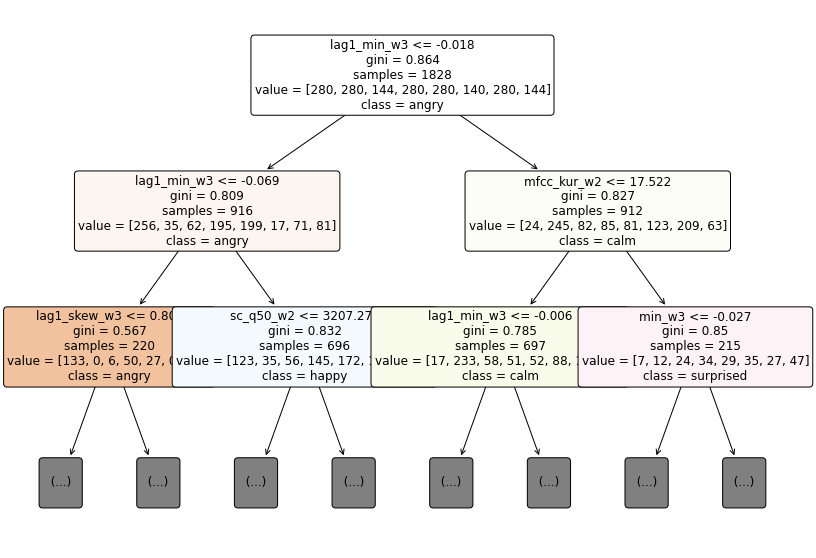

In [238]:
plt.figure(figsize=(14, 10))
plot_tree(explainer, 
          feature_names=X_train.columns, 
          class_names=np.unique(y_train), 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [239]:
#LIME

In [240]:
pip install lime

     |████████████████████████████████| 275 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 5.8 MB/s eta 0:00:01     |████████████████████████████    | 11.4 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 243 kB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 10.1 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c92515149a40dc5fad68217394482374dce4e5558e6892df72d2b3692b451099
  Stored in directory: /Users/davidepiccoli/Library/Caches/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [241]:
from lime.lime_tabular import LimeTabularExplainer

In [256]:
x = X_test.loc[21, :]

x

actor           1.900000e+01
frame_count     1.761760e+05
sum            -1.481323e-01
mean           -8.408201e-07
std             1.784298e-03
                    ...     
stft_q50_w4     7.790731e-01
stft_q75_w4     8.966517e-01
stft_q95_w4     1.000000e+00
stft_kur_w4     2.105289e-01
stft_skew_w4   -7.655243e-01
Name: 21, Length: 375, dtype: float64

In [251]:
lime_explainer = LimeTabularExplainer(X_test, 
                                      feature_names=X_train.columns,
                                      class_names=np.unique(y_train), discretize_continuous=False)

In [257]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [258]:
exp.local_exp

{1: [(20, -0.012006632897120397),
  (6, -0.009657629407489836),
  (155, 0.007957516166126876),
  (169, 0.0075703627569800045),
  (165, -0.0035099301345369394),
  (66, 0.003219218214908817),
  (140, 0.0030564044984229166),
  (143, 0.0022354184640091886),
  (217, 0.0022245618059773702),
  (142, 0.0020624159606314474)]}

In [259]:
exp.show_in_notebook()